<a href="https://colab.research.google.com/github/tanvircr7/meh/blob/master/GNN_cora_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python -c "import torch; print(torch.version.cuda)"

12.1


In [ ]:
# PyTorch version
!python -c "import torch; print(torch.__version__)"

2.1.0+cu121


In [ ]:
!pip install torch-geometric
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.10.0+cu121.html
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.10.0+cu121.html

Looking in links: https://data.pyg.org/whl/torch-2.10.0+cu121.html
  Using cached torch_sparse-0.6.18.tar.gz (209 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for torch-sparse: filename=torch_sparse-0.6.18-cp310-cp310-linux_x86_64.whl size=1035675 sha256=f4436bf6f29e4ac312618845b5e1503f6801110cd631bf852d8a5359bb9d9f13
  Stored in directory: /root/.cache/pip/wheels/c9/dd/0f/a6a16f9f3b0236733d257b4b4ea91b548b984a341ed3b8f38c
Successfully built torch-sparse
Looking in links: https://data.pyg.org/whl/torch-2.10.0+cu121.html
  Using cached torch_scatter-2.1.2.tar.gz (108 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for torch-scatter: filename=torch_scatter-2.1.2-cp310-cp310-linux_x86_64.whl size=495091 sha256=b6e90bb9f49384b16136486bf3dcf24861dac888fc785e29bea52a847db5efb6
  Stored in directory: /root/.cache/pip/wheels/92/f1/2b/3b46d54b134259f58c8363568569053248040859b1a145b3ce
Successfully built torch-scatter


In [ ]:
import torch
from torch_geometric.data import Data

Common Benchmark Datasets
PyG contains a large number of common benchmark datasets, e.g., all Planetoid datasets (Cora, Citeseer, Pubmed), all graph classification datasets from http://graphkernels.cs.tu-dortmund.de and their cleaned versions, the QM7 and QM9 dataset, and a handful of 3D mesh/point cloud datasets like FAUST, ModelNet10/40 and ShapeNet.

Initializing a dataset is straightforward. An initialization of a dataset will automatically download its raw files and process them to the previously described Data format. E.g., to load the ENZYMES dataset (consisting of 600 graphs within 6 classes), type:

In [ ]:
from torch_geometric.datasets import TUDataset
dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES')

Processing...
Done!


In [ ]:
len(dataset)

600

In [ ]:
dataset.num_classes

6

In [ ]:
dataset.num_node_features

3

In [ ]:
data = dataset[0]

data.x: Node feature matrix with shape [num_nodes, num_node_features]

data.edge_index: Graph connectivity in COO format with shape [2, num_edges] and type torch.long

data.edge_attr: Edge feature matrix with shape [num_edges, num_edge_features]

data.y: Target to train against (may have arbitrary shape), e.g., node-level targets of shape [num_nodes, *] or graph-level targets of shape [1, *]

data.pos: Node position matrix with shape [num_nodes, num_dimensions]

In [ ]:

data

Data(edge_index=[2, 168], x=[37, 3], y=[1])

In [ ]:
from torch_geometric.utils import to_networkx

In [ ]:
type(data)

torch_geometric.data.data.Data

In [ ]:
networkX_graph = to_networkx(data)

In [ ]:
type(networkX_graph)

networkx.classes.digraph.DiGraph

In [ ]:
import networkx as nx

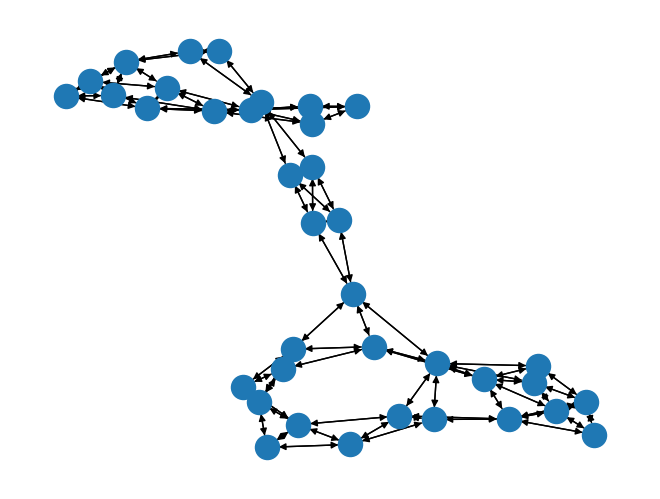

In [ ]:
nx.draw(networkX_graph)

# **Cora dataset**
"The Cora dataset consists of 2708 scientific publications classified into one of seven classes. The citation network consists of 5429 links. Each publication in the dataset is described by a 0/1-valued word vector indicating the absence/presence of the corresponding word from the dictionary. The dictionary consists of 1433 unique words." - Papers with Code.

In [ ]:
from torch_geometric.datasets import Planetoid
cora_dataset = Planetoid(root='tmp/Cora', name='Cora')

Processing...
Done!


In [ ]:
cora_dataset

Cora()

In [ ]:
cora_dataset.len()

1

In [ ]:
# number of graphs
print("Number of graphs: ", len(cora_dataset))

# number of features
print("Number of features: ", cora_dataset.num_features)

# number of classes
print("Number of classes: ", cora_dataset.num_classes)

Number of graphs:  1
Number of features:  1433
Number of classes:  7


In [ ]:
c_ds = cora_dataset[0]
c_ds

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [ ]:
# number of nodes
print("Number of nodes: ", c_ds.num_nodes)

# number of edges
print("Number of edges: ", c_ds.num_edges)

# check if directed
print("Is directed: ", c_ds.is_directed())

Number of nodes:  2708
Number of edges:  10556
Is directed:  False


In [ ]:
c_ds.x[:0].shape

torch.Size([0, 1433])

In [ ]:
c_ds.x[:1].shape

torch.Size([1, 1433])

In [ ]:
c_ds.x[0].shape

torch.Size([1433])

In [ ]:
# sample nodes from the graph
print("Shape of sample nodes: ", c_ds.x[:5].shape)

Shape of sample nodes:  torch.Size([5, 1433])


In [ ]:
c_ds_5 = c_ds.x[:5]

In [ ]:
c_ds_5.shape

torch.Size([5, 1433])

In [ ]:
# number of graphs
print("Number of graphs: ", len(c_ds_5))
print("Number of features: ", len(c_ds_5[0]))

Number of graphs:  5
Number of features:  1433


In [ ]:
c_ds

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [ ]:
## train_mask=[2708], val_mask=[2708], test_mask=[2708]
## Look at the above

In [ ]:
# check training nodes
print("# of nodes to train on: ", c_ds.train_mask.sum().item())
# check test nodes
print("# of nodes to test on: ", c_ds.test_mask.sum().item())
# check validation nodes
print("# of nodes to validate on: ", c_ds.val_mask.sum().item())

# of nodes to train on:  140
# of nodes to test on:  1000
# of nodes to validate on:  500


In [ ]:
type(c_ds)

torch_geometric.data.data.Data

In [ ]:
networkX_graph = to_networkx(c_ds)

In [ ]:
type(networkX_graph)

networkx.classes.digraph.DiGraph

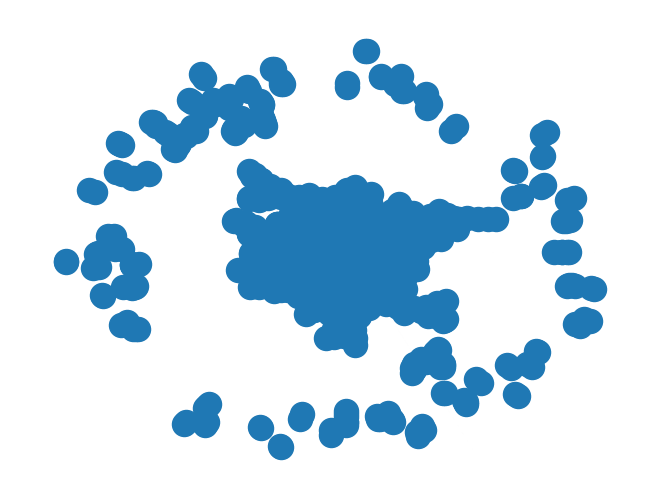

In [ ]:
nx.draw(networkX_graph)

In [ ]:
networkX_graph

In [ ]:

print(nx.is_weighted(networkX_graph))
print(nx.is_directed(networkX_graph))
print(networkX_graph.order())
print(networkX_graph.number_of_edges())
print(networkX_graph.number_of_nodes())
print(networkX_graph.edges)

False
True
2708
10556
2708
[(0, 633), (0, 1862), (0, 2582), (1, 2), (1, 652), (1, 654), (2, 1), (2, 332), (2, 1454), (2, 1666), (2, 1986), (3, 2544), (4, 1016), (4, 1256), (4, 1761), (4, 2175), (4, 2176), (5, 1629), (5, 1659), (5, 2546), (6, 373), (6, 1042), (6, 1416), (6, 1602), (7, 208), (8, 269), (8, 281), (8, 1996), (9, 723), (9, 2614), (10, 476), (10, 2545), (11, 1655), (11, 1839), (12, 1001), (12, 1318), (12, 2661), (12, 2662), (13, 1701), (13, 1810), (14, 158), (14, 2034), (14, 2075), (14, 2077), (14, 2668), (15, 1090), (15, 1093), (15, 1271), (15, 2367), (16, 970), (16, 1632), (16, 2444), (16, 2642), (17, 24), (17, 927), (17, 1315), (17, 1316), (17, 2140), (18, 139), (18, 1560), (18, 1786), (18, 2082), (18, 2145), (19, 1939), (20, 1072), (20, 2269), (20, 2270), (20, 2374), (20, 2375), (21, 1043), (21, 2310), (22, 39), (22, 1234), (22, 1702), (22, 1703), (22, 2238), (23, 2159), (24, 17), (24, 201), (24, 598), (24, 1636), (24, 1701), (24, 2139), (24, 2141), (25, 1301), (25, 1344)

In [ ]:
c_ds.x.shape

torch.Size([2708, 1433])

In [ ]:
c_ds.x[1734].shape

torch.Size([1433])

In [ ]:
c_ds_10 = c_ds.x[:10]

In [ ]:
c_ds_10.shape

torch.Size([10, 1433])

In [ ]:
type(c_ds_10)

torch.Tensor

In [ ]:
c_ds

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [ ]:
nx.write_gexf(networkX_graph, 'cora_ex.gexf')


nx.write_graphml(networkX_graph, 'cora_ex.graphml')

# **Cora Dataset from NetworkX**
download cora.tgz from the link below:
https://linqs-data.soe.ucsc.edu/public/lbc/cora.tgz
upload cora.tgz to google colab